<a id="Home"></a>

# Public Health: West Nile Virus and Mosquitos
## - A Premlininary Statistical Invesitgation.

---

### - Overview of West Nile Virus:

West Nile Virus (WNV) is a viral infection primarily transmitted to humans through the bite of infected mosquitoes. The virus is named after the West Nile region in Uganda, where it was first identified in 1937. It belongs to the Flavivirus genus and is closely related to other mosquito-borne viruses, including Zika, dengue, and yellow fever.

###  - Prevalence of West Nile Virus in Chicago, Illinois:

- Outbreaks and Seasonal Fluctuations: Chicago, like many other regions in the United States, experiences periodic outbreaks of West Nile Virus. The virus tends to be more prevalent during the warmer months, typically from late spring to early fall when mosquito activity is at its peak.
<br>

- Human Infections: Over the years, there have been reported cases of human infections caused by West Nile Virus in Chicago. People of all ages are susceptible to the infection, but the elderly and those with compromised immune systems are at a higher risk of severe illness if infected.
<br>
- Mosquito Surveillance and Control Efforts: To combat the spread of West Nile Virus, Chicago authorities implement mosquito surveillance and control programs. These initiatives involve monitoring mosquito populations, identifying areas with higher virus activity, and implementing targeted control measures such as larviciding and adulticiding to reduce mosquito numbers and limit the risk of human infection.

---

This is a working document investigating the the driving contributors for the spread of WNV throughout Chicago Illinois between the years of 2007 - 2019. The information in this notebook will form the basis for a five page report on findings as well as a five minute presentation in order to expand on insights gained through visual analysis.

---

### Table of Contents:
- [Part 0 - Preparation](#Part0)
- [Part 1 - Exploratory Data Analysis](#Part1)
  - [Numeric Distributions](#Part1.1)
  - [Non-Numeric Distributions](#Part1.2)
  - [Data Cleaning](#Part1.3)
- [Part 2 - Visual Analysis](#Part2)
  - [Mosquito Averages](#Part2.1)
  - [Mosquito Numbers by Date](#Part2.2)
  - [Trap Type and WNV](#Part2.3)
  - [WNV Prevelance by Species](#Part2.4)
- [Part 3 - Statistical Analysis](#Part3)
- [Part 4 - Findings Summary](#Part4)
[nrfijrinvrijnrv](#TEST)



---

<a id='Part0'></a>

## Part 0 - Preparation

### - In this section we will import the necessary libraries, format our notebook and load in the working data.

In [1]:
# This code makes the output cells in a Jupyter notebook fill the entire available width of the notebook interface (and easier to read).
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Loading in our data and creating a Pandas dataframe.
MASTER = pd.read_csv("../Data/mosquito_data.csv")
MASTER.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [4]:
# Check summary of information about dataframe.
MASTER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


- Already we can see above that there are missing records for columns `Lat` and `Lon`. Approximately 3,000 missing values for each column. We will address these issues later.

## Data Dictionary

To help us with our analysis, it's better to take some time to study the data dictionary below. 

- `Year` - Year that the WNV test is performed.		
- `Week` - Week that the WNV test is performed.		
- `Address Block` - Address of the location of trap.		
- `Block` - Block number of address. 		
- `Trap` - Id of the trap. Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.	
- `Trap type` - Type of trap.		
- `Date` - Date and time that the WNV test is performed. Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.	
- `Mosquito number` -	Number of mosquitoes caught in this trap. These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.	
- `Mosquito ID` - Id for Mosquito species.		
- `WNV Present`- Whether West Nile Virus was present in these mosquitos.		
- `Species` - Mosquito species.		
- `Lat` - Latitude of trap.		
- `Lon` - Longitude of trap.	


Further information on the Data can be found at :-
https://www.kaggle.com/competitions/predict-west-nile-virus/data

In [5]:
# Here we will create a copy of MASTER to act as our working dataframe.
df = MASTER.copy()

[Return Home](#Home)

---

<a id='Part1'></a>

## Part 1 - Exploratory Data Analysis

### - In this section we will perform the following steps.
- Examine the dataframe and it's data types.
- Explore the distributions of numeric and categorical features.
- Undertake any necessary data cleaning and prepare the data for further statistical analysis.

In [6]:
# First let's get an understanding of how our data looks.
print(f'Our dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

Our dataframe has 18495 rows and 13 columns.


- We have a relatively small dataset to work with so it is unlikely that the data preprocessing and data cleaning stages will be overly extensive.

In [7]:
# Now we know the dimensions of our dataframe, what data types are stored in our colums.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


- This looks as expected. Although if we are hoping to perform any kind of computation on records using their `Date`, this will need to be converted to a datetime data type.

In [8]:
# Changing format of the "Date" column to a datetime.
df['Date'] = pd.to_datetime(df['Date']).astype('datetime64')

# Creating new features from the "Date" column.
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [9]:
# Sanity check.
df.head(1)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Day,Month
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN,26,9


- We have successfully created two new features from the `Date` column, these will come in handy later on.

In [10]:
# Review of the result, the format of the "Date" column is now 'datetime64[ns]'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
 13  Day              18495 non-null  int64         
 14  Month            18495 non-null  int64

---

##### The following columns are storing numerical data :-
- `Year`
    
- `Week`    
- `Block`
- `Date`
- `Mosquito number`
- `Lat`
- `Lon`
- `Day`
- `Month`

---

<a id='Part1.1'></a>

### - Let's take a closer look at our Numeric data.

In [11]:
# Here we are creating a variable containing all numeric data.
numeric = df.select_dtypes(exclude='object').columns

In [12]:
# This offers a brief summary of the numerical data.
df[numeric].describe()

,Year,Week,Block,Mosquito number,Lat,Lon,Day,Month
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000,18495.000000,18495.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642,15.707921,7.627088
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545,8.665473,0.998079
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473,1.000000,5.000000
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459,9.000000,7.000000
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698,16.000000,8.000000
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873,23.000000,8.000000
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051,31.000000,10.000000


### The table above tells us :-
- The greatest number of mosquitos caught was 50 (although we know this is misleading if we refer to our data dictionary).
- There are no records between weeks 41 and 19 of the following year.
- We have 12 years of available data.
- The data was collected between ~0.18 degrees of Latitude and ~0.16 degrees of Longitude.
- The data stored in the Mosquito number column may be heavily skewed.

- Let's take a look at how our columns are distributed.

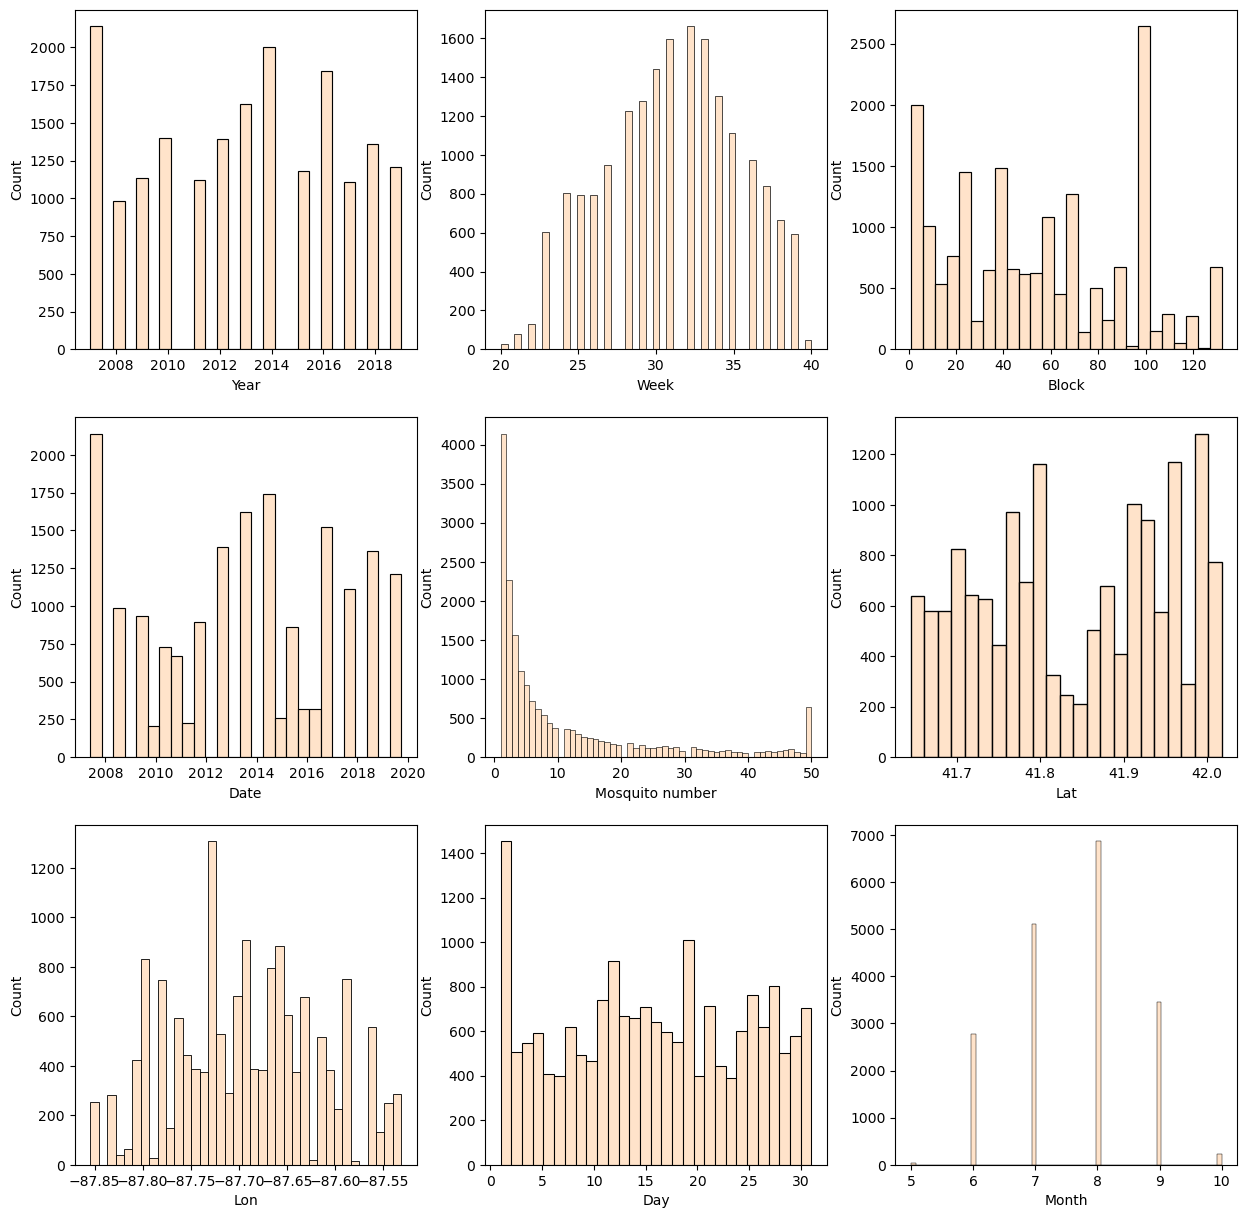

In [13]:
# Creating a subplot object to populate.
plt.subplots(3,3, figsize=(15, 15))

# Initialize a counter to keep track of subplot positions
counter = 1

# Loop through each column in the 'numeric' list and plot histograms in the subplots
for col in list(numeric):
    plt.subplot(3,3,counter)
    sns.histplot(df[col], color ='peachpuff')
    
# Increment the counter to move to the next subplot position        
    counter+=1

### The above plots tell us :-

- The `Week` column is close to a normal distribution.
- There is a variable with significant dominance in the `Block` column.
- There is a distinct uptick in records collected on Day 1, this indicates possible batch collection of data.
- The `Mosquito number` column is heavily right skewed and possibly logarithmic.
- The `Mosquito number` column has a spike in the number of records with 50 mosquitos (as expected). 

---

<a id='Part1.2'></a>

### - Let's take a closer look at our Non-Numeric data.

##### The following columns are storing non-numeric data :-
- `Address Block`

- `Block`
- `Trap`
- `Trap type`
- `Mosquito ID`
- `WNV Present`
- `Species`

In [14]:
# Here we are creating a variable containing all non-numeric data.
categorical = df.select_dtypes('object').columns

In [15]:
list(categorical)

['Address Block', 'Trap', 'Trap type', 'Mosquito ID', 'WNV Present', 'Species']

In [16]:
# Here we are printing the unique values stored within each of our non-numeric features.

print(f"There are {df['Address Block'].nunique()} unique classes in the 'Address Block' column.")
print(f"There are {df['Trap'].nunique()} unique 'Trap' codes.")
print(f"There are {df['Trap type'].nunique()} unique recorded types of mosquito traps in the 'Trap type' column.")
print(f"There are {df['Date'].nunique()} records with unique dates stored in the 'Date' column.")
print(f"There are {df['Mosquito ID'].nunique()} 'unique recorded Mosquito IDs'.")
print(f"There are {df['WNV Present'].nunique()} unique classes in the 'WNV Present' column.")
print(f"There are {df['Species'].nunique()} unique mosquito species recorded in the 'Species' column.")

There are 154 unique classes in the 'Address Block' column.
There are 190 unique 'Trap' codes.
There are 4 unique recorded types of mosquito traps in the 'Trap type' column.
There are 298 records with unique dates stored in the 'Date' column.
There are 4 'unique recorded Mosquito IDs'.
There are 2 unique classes in the 'WNV Present' column.
There are 4 unique mosquito species recorded in the 'Species' column.


We will explore the distribution of the following columns :-  
   
- `Trap type`   

- `Mosquito ID`
- `WNV Present` 
- `Species`



We are not concerned with these columns for the following reasons :-
   
   - `Date` ( With `Day`, `Week`, `Month`, `Year` all featured within our dataframe, we can explore the significance of date this way with no loss of granularity. )
   
   - `Address Block` ( We have already explored `Block` and we have the highest level of granularity available with `Lat` and `Lon`. )
   
   - `Trap` ( With `Trap type` information, this column is a unique identifier for each trap, it is redundant in our use case. )
   


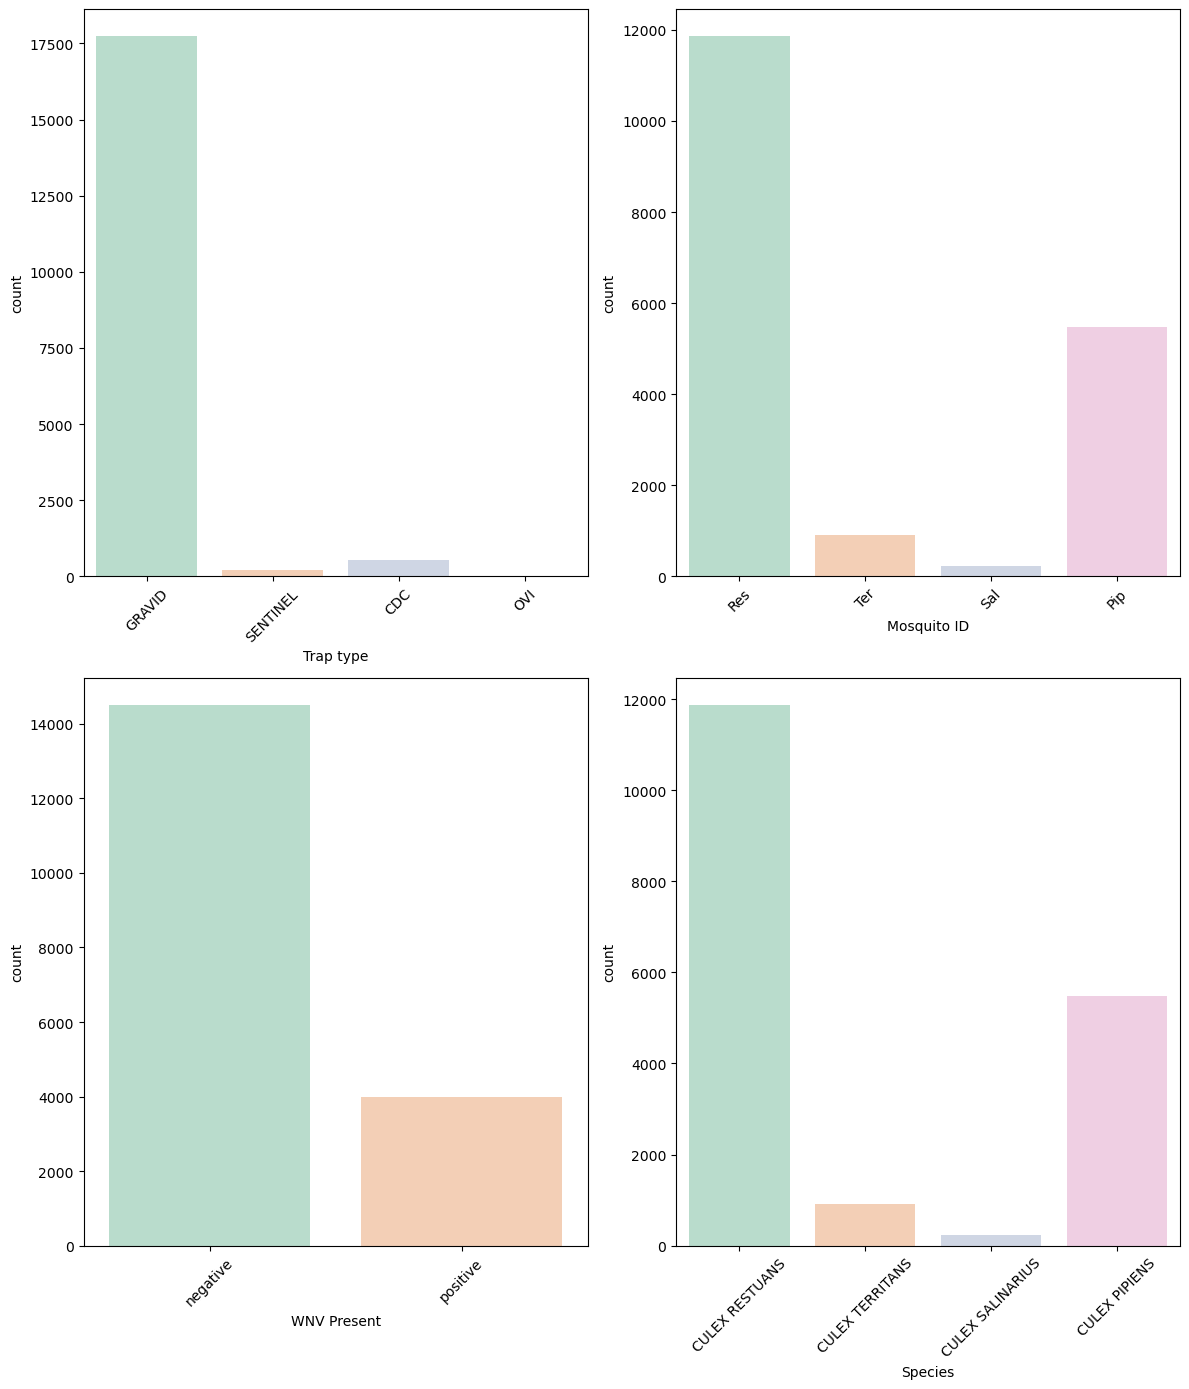

In [17]:
columns = ['Trap type', 'Mosquito ID', 'WNV Present', 'Species']

# Create a subplot grid to populate.
plt.subplots(2, 2, figsize=(12, 14))

# Initialize a counter to keep track of subplot positions.
counter = 1

# Loop through each column in the 'columns' list and plot histograms in the subplots.
for col in columns:
    plt.subplot(2, 2, counter)  # Adjusted the subplot to match the grid shape.
    sns.countplot(data=df, x=col, palette='Pastel2',)  # Explicitly pass the 'data' and 'x' parameters.
    plt.tick_params(axis='x', rotation=45)
    # Increment the counter to move to the next subplot position.        
    counter += 1

# Show the plot
plt.tight_layout()
plt.show()

### The above plots tell us :-

- `Mosquito ID` and `Species` are distributed identically. We will explore to further check for redundancy.
- There is a huge class imbalance with our data biased towards 'GRAVID' (~95%) in the `Trap type` column.
- There is an approximate ~ 21%/~79% imabalance within our `WNV Present` column.
- The CULEX RESTUANS looks to make up ~64% of all data within the `Species` column.
- There appear to be ~0 records for the OVI variable in the `Trap type` column.

##### Checking the distributions as percentages is a good approach for additional complimentary insight.

In [18]:
print(f'The distribution of categorical variables that make \nup the "Species" column (expressed as a percentage) are:\n{df["Species"].value_counts() / len(df) * 100}')
print('-------------------------------------------------------------------------')
print(f'The distribution of categorical variables that make \nup the "WNV Present" column (expressed as a percentage) are:\n{df["WNV Present"].value_counts() / len(df) * 100}')
print('-------------------------------------------------------------------------')
print(f'The distribution of categorical variables that make \nup the "Trap type" column (expressed as a percentage) are:\n{df["Trap type"].value_counts() / len(df) * 100}')
print('-------------------------------------------------------------------------')
print(f'The distribution of categorical variables that make \nup the "Mosquito ID" column (expressed as a percentage) are:\n{df["Mosquito ID"].value_counts() / len(df) * 100}')

The distribution of categorical variables that make 
up the "Species" column (expressed as a percentage) are:
CULEX RESTUANS      64.157881
CULEX PIPIENS       29.662071
CULEX TERRITANS      4.958097
CULEX SALINARIUS     1.221952
Name: Species, dtype: float64
-------------------------------------------------------------------------
The distribution of categorical variables that make 
up the "WNV Present" column (expressed as a percentage) are:
negative    78.404974
positive    21.595026
Name: WNV Present, dtype: float64
-------------------------------------------------------------------------
The distribution of categorical variables that make 
up the "Trap type" column (expressed as a percentage) are:
GRAVID      95.923222
CDC          2.941335
SENTINEL     1.130035
OVI          0.005407
Name: Trap type, dtype: float64
-------------------------------------------------------------------------
The distribution of categorical variables that make 
up the "Mosquito ID" column (expressed as

- The above results support our previous visual analysis

[Return Home](#Home)

---

<a id='Part1.3'></a>

## Data Cleaning

#### Now we can begin to identify and rectify any errors, inconsistencies, and inaccuracies in our dataframe to ensure data quality and reliability. 

Earlier, we saw that `Mosquito ID` and `Species` appeared to be duplicates. However, although the proportions in each class are identical, we should check that the columns are matched at a row level.

In [19]:
# Here we are grouping the two subject columns and counting the matches.
df.groupby(['Mosquito ID','Species'])['Species'].count()

Mosquito ID  Species         
Pip          CULEX PIPIENS        5486
Res          CULEX RESTUANS      11866
Sal          CULEX SALINARIUS      226
Ter          CULEX TERRITANS       917
Name: Species, dtype: int64

We can see that both columns are consistently aligned, we can be confident in dropping one of the columns. As the `Species` column is more informative, we'll drop `Mosquito ID`.

In [20]:
# Here we are dropping the Mosquito ID column.
df.drop(columns='Mosquito ID', inplace=True)

In [21]:
# Sanity check / listing remaining columns.
list(df.columns)

['Year',
 'Week',
 'Address Block',
 'Block',
 'Trap',
 'Trap type',
 'Date',
 'Mosquito number',
 'WNV Present',
 'Species',
 'Lat',
 'Lon',
 'Day',
 'Month']

---

We know that some of our Date based features can be deduced from the `Date` column, let's take a closer look at the information stored here.

In [22]:
# in terms of date
df['Date'].dt.date

0        2019-09-26
1        2019-09-26
2        2019-09-26
3        2019-09-26
4        2019-09-26
            ...    
18490    2016-09-09
18491    2007-08-24
18492    2016-07-27
18493    2017-08-17
18494    2015-08-20
Name: Date, Length: 18495, dtype: object

We already have a `Year` feature and we have extracted the `Month` and `Day` elements from the timestamp. However, it makes sense to retain the week numbers as these help us to analyse for patterns according to routines. So we can drop the date elements. What about the time?

In [23]:
# A brief look at the time element of our datetime Date column.
df['Date'].dt.time

0        00:09:00
1        00:09:00
2        00:09:00
3        00:09:00
4        00:09:00
           ...   
18490    00:09:00
18491    00:08:00
18492    00:07:00
18493    00:08:00
18494    00:08:00
Name: Date, Length: 18495, dtype: object

In [24]:
# How many unique times are in our dataset?
unique_times = list(df['Date'].dt.time.unique())
print(f'There are only {len(unique_times)} different times recorded in the entire dataset of {df.shape[0]} rows.')
unique_times

There are only 25 different times recorded in the entire dataset of 18495 rows.


[datetime.time(0, 9),
 datetime.time(0, 8),
 datetime.time(0, 7),
 datetime.time(0, 6),
 datetime.time(0, 10),
 datetime.time(0, 5),
 datetime.time(8, 8, 19),
 datetime.time(2, 8, 57),
 datetime.time(2, 8, 53),
 datetime.time(2, 8, 34),
 datetime.time(2, 8, 26),
 datetime.time(2, 8, 23),
 datetime.time(2, 8, 8),
 datetime.time(11, 7, 18),
 datetime.time(11, 7, 17),
 datetime.time(3, 7, 41),
 datetime.time(3, 7, 40),
 datetime.time(3, 7, 33),
 datetime.time(2, 7, 45),
 datetime.time(11, 6, 17),
 datetime.time(4, 6, 59),
 datetime.time(4, 6, 58),
 datetime.time(4, 6, 56),
 datetime.time(4, 6, 7),
 datetime.time(4, 6, 6)]

It appears that it is likely that traps at multiple locations share the same times for recording data. This sounds like data entry is in batches, like we suspected. Therefore, the time elements are unlikely to be adding relevant information to our dataset. Consequently, we can drop the `Date` column entirely. 


In [25]:
df.drop(columns='Date', inplace=True)

---

We have also seen that the values in `Block` might be the same as the building numbers in the `Address Block` column. Let's test if this is further duplicated data.

In [26]:
df.groupby(['Address Block','Block'])['Block'].count()

Address Block                       Block
100XX W OHARE                       100       226
100XX W OHARE AIRPORT               100      2039
101XX S STONY ISLAND AVE            101       369
104XX S OGLESBY AVE                 104         1
104XX S VINCENNES AVE               104       138
                                             ... 
93XX S DR MARTIN LUTHER KING JR DR  93         12
96XX S HOYNE AVE                    96         13
96XX S LONGWOOD DR                  96          3
98XX S AVENUE G                     98         11
9XX W GARFIELD BLVD                 9         170
Name: Block, Length: 154, dtype: int64

Using the similar **groupby()** function script as before, we return 154 matches. We could check the whole output by eye. However, a **lambda** function will quickly check for total row matches.

In [27]:
# Here we are renaming the 'Address Block' column since the lambda function does not accommodate feature names with spaces.
df.rename(columns={'Address Block':'Address_Block'}, inplace=True)

In [28]:
# Where the string in 'Block' is contained in 'Address Block' (i.e. True) return binary (1 as positive) and return total.
np.where(df.apply(lambda x: str(x.Block) in str(x.Address_Block), axis=1)==True, 1, 0).sum()

18495

We can see that for EVERY row, the `Block` features in the `Address Block` so we can readily drop the former:

In [29]:
# Dropping the 'Block' column.
df.drop(columns='Block', inplace=True)

In [30]:
# Sanity check.
df.head(1)

,Year,Week,Address_Block,Trap,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Day,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2,negative,CULEX RESTUANS,NaN,NaN,26,9


---

#### Now we can address the missing values within the dataframe.

In [31]:
# Summing up all the NaN values in our dataframe.
df.isna().sum().sum()

5848

In [32]:
# Which of our columns do these missing values belong to?
df.isna().sum()

Year                  0
Week                  0
Address_Block         0
Trap                  0
Trap type             0
Mosquito number       0
WNV Present           0
Species               0
Lat                2924
Lon                2924
Day                   0
Month                 0
dtype: int64

In [33]:
# What percentage of our data is missing for each column?
df.isna().sum()/len(df)*100

Year                0.000000
Week                0.000000
Address_Block       0.000000
Trap                0.000000
Trap type           0.000000
Mosquito number     0.000000
WNV Present         0.000000
Species             0.000000
Lat                15.809678
Lon                15.809678
Day                 0.000000
Month               0.000000
dtype: float64

In [34]:
# What percentage of our data is missing from the entire dataframe?
percentage_missing = df.isna().sum().sum() / (df.size) * 100
print(f'The percentage of missing data in the entire DataFrame is: {percentage_missing:.2f}%')

The percentage of missing data in the entire DataFrame is: 2.63%


As we saw earlier, it appears that only two columns are affected by missing data: `Lat` and `Lon`. With nearly 16% of rows missing these values, there is an argument to drop both columns but we would like to retain the option to map our data. Let's take a closer look at the affected rows to see if there are any obvious patterns allowing use to impute missing data.

In [35]:
# Pulling out 5 sample rows which are missing data from the 'Lat' column.
df[df['Lat'].isna()].sample(5)

,Year,Week,Address_Block,Trap,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Day,Month
14773,2007,26,79XX S CHICAGO,T083,GRAVID,1,negative,CULEX PIPIENS,NaN,NaN,2,8
8611,2012,31,100XX W OHARE,T903,GRAVID,21,positive,CULEX RESTUANS,NaN,NaN,3,8
16919,2017,33,100XX W OHARE AIRPORT,T905,GRAVID,9,positive,CULEX RESTUANS,NaN,NaN,17,8
18364,2018,30,100XX W OHARE AIRPORT,T900,GRAVID,8,positive,CULEX PIPIENS,NaN,NaN,26,7
310,2019,33,100XX W OHARE,T903,GRAVID,3,positive,CULEX RESTUANS,NaN,NaN,15,8


In [36]:
# The following addresses are associated with missing coordinates.
df['Address_Block'][df['Lat'].isna()].value_counts()

100XX W OHARE AIRPORT    2039
4XX W 127TH               301
100XX W OHARE             226
79XX S CHICAGO            136
81XX S ASHLAND            122
115XX S AVENUE L           40
65XX N OAK PARK AVE        24
30XX S HOYNE               15
98XX S AVENUE G            11
43XX N ASHLAND             10
Name: Address_Block, dtype: int64

It seems that adding latitude and longitude for **100XX W OHARE AIRPORT** would save a large proportion of affected rows.

A quick Google search shows the latitude and longitude to be *41.978611* and *-87.904724* accoringly. My only reservation is that O'Hare Airport is a large site within a relatively small sample area. However, we CAN repeat this for each of the other locations.

In [37]:
# Imputing missing values with coordinates found using Google Maps.

df.loc[df["Address_Block"] == "100XX W OHARE AIRPORT", ["Lat", "Lon"]] = [41.97934, -87.90892]
df.loc[df["Address_Block"] == "4XX W 127TH", ["Lat", "Lon"]] = [41.66329, -87.63203]
df.loc[df["Address_Block"] == "100XX W OHARE", ["Lat", "Lon"]] = [41.97765, -87.88092]
df.loc[df["Address_Block"] == "79XX S CHICAGO", ["Lat", "Lon"]] = [41.75440, -87.59081]
df.loc[df["Address_Block"] == "81XX S ASHLAND", ["Lat", "Lon"]] = [41.74672, -87.66366]
df.loc[df["Address_Block"] == "115XX S AVENUE L", ["Lat", "Lon"]] = [41.68634, -87.53644]
df.loc[df["Address_Block"] == "65XX N OAK PARK AVE", ["Lat", "Lon"]] = [41.99911, -87.79553]
df.loc[df["Address_Block"] == "30XX S HOYNE", ["Lat", "Lon"]] = [41.83665, -87.67775]
df.loc[df["Address_Block"] == "98XX S AVENUE G", ["Lat", "Lon"]] = [41.71784, -87.53160]
df.loc[df["Address_Block"] == "43XX N ASHLAND", ["Lat", "Lon"]] = [41.96001, -87.66941]

In [38]:
# Sanity check
df.head()

,Year,Week,Address_Block,Trap,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Day,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2,negative,CULEX RESTUANS,41.979340,-87.908920,26,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,1,negative,CULEX RESTUANS,41.798211,-87.736925,26,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2,negative,CULEX RESTUANS,41.987245,-87.689417,26,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,1,negative,CULEX RESTUANS,41.953664,-87.724987,26,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,9,negative,CULEX RESTUANS,41.657069,-87.546049,26,9


In [39]:
# Sanity check.
df.isna().sum()

Year               0
Week               0
Address_Block      0
Trap               0
Trap type          0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
Day                0
Month              0
dtype: int64

We have successfully imputed values for all of our locations where coordinates were previously missing. This means that we have avoided dropping any rows from the dataset. This is definitely preferred!

---

#### Here we will investigate any potential location information duplicated in `Address Block` and `Trap`.

We hope to find that each trap is used in one unique location to prove that location information would be captured.

In [40]:
# how many different 'Trap' codes
df['Trap'].value_counts()

T002     406
T114     340
T031     333
T008     326
T138     304
        ... 
T128A      1
T135B      1
T241       1
T167       1
T040       1
Name: Trap, Length: 190, dtype: int64

In [41]:
# how many different 'Address Block' classes
df['Address_Block'].value_counts()

100XX W OHARE AIRPORT       2039
41XX N OAK PARK AVE          408
101XX S STONY ISLAND AVE     369
52XX S KOLMAR AVE            349
1XX N CENTRAL PARK DR        335
                            ... 
29XX N KENNETH AVE             2
54XX W PARKER AVE              1
4XX W 127TH ST                 1
104XX S OGLESBY AVE            1
21XX S HAMLIN AVE              1
Name: Address_Block, Length: 154, dtype: int64

In [42]:
# unique combinations of 'Trap' and 'Address Block'
df.groupby('Trap')['Address_Block'].nunique().sum()

191

In [43]:
# most number of addresses featuring a 'Trap'
df.groupby('Trap')['Address_Block'].nunique().max()

2

We see that there are 191 unique combinations of address and trap ID with just one trap being used in two different locations. Let's explore this further.

In [44]:
# identifying the trap used in two locations
df.groupby('Trap')['Address_Block'].nunique().sort_values(ascending=False).head(1)

Trap
T035    2
Name: Address_Block, dtype: int64

In [45]:
# the number of rows of data corresponding to each address and T035 trap
df[df['Trap']=='T035'].groupby('Address_Block')['Trap'].value_counts()

Address_Block  Trap
30XX S HOYNE   T035     15
5XX W 72ND ST  T035    145
Name: Trap, dtype: int64

In [46]:
# viewing rows corresponding to one address
df[df['Address_Block'] == '30XX S HOYNE']

,Year,Week,Address_Block,Trap,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Day,Month
13806,2007,39,30XX S HOYNE,T035,GRAVID,14,negative,CULEX PIPIENS,41.83665,-87.67775,4,10
13986,2007,37,30XX S HOYNE,T035,GRAVID,2,negative,CULEX PIPIENS,41.83665,-87.67775,18,9
13995,2007,37,30XX S HOYNE,T035,GRAVID,1,negative,CULEX TERRITANS,41.83665,-87.67775,18,9
14002,2007,36,30XX S HOYNE,T035,GRAVID,1,negative,CULEX PIPIENS,41.83665,-87.67775,12,9
14296,2007,34,30XX S HOYNE,T035,GRAVID,2,negative,CULEX PIPIENS,41.83665,-87.67775,24,8
14404,2007,33,30XX S HOYNE,T035,GRAVID,5,negative,CULEX PIPIENS,41.83665,-87.67775,21,8
14422,2007,33,30XX S HOYNE,T035,GRAVID,2,negative,CULEX RESTUANS,41.83665,-87.67775,21,8
14500,2007,32,30XX S HOYNE,T035,GRAVID,4,negative,CULEX PIPIENS,41.83665,-87.67775,15,8
14592,2007,32,30XX S HOYNE,T035,GRAVID,1,positive,CULEX RESTUANS,41.83665,-87.67775,15,8
14724,2007,31,30XX S HOYNE,T035,GRAVID,1,negative,CULEX RESTUANS,41.83665,-87.67775,7,8


We can see that Trap T035 was only recorded at this address block on 15 ocassions. In order to justify dropping both 'Address Block' and 'Trap' columns, we must remove these 15 rows of data to secure the unique association of specific locations with address and trap values.

In [47]:
# Dropping the 15 rows.
df = df.loc[~((df['Address_Block'] == '30XX S HOYNE') & (df['Trap'] == 'T035'))]

In [48]:
# Sanity check.
df.shape

(18480, 12)

We see that we have dropping 15 rows so we should now only see Trap T035 associated with one address:

In [49]:
# Further sanity checking.
df.groupby('Trap')['Address_Block'].nunique().sum()

190

In [50]:
# Even further sanity checking.
df[df['Trap'] == 'T035'].groupby('Address_Block')['Trap'].value_counts()

Address_Block  Trap
5XX W 72ND ST  T035    145
Name: Trap, dtype: int64

Success! We can drop both the 'Address Block' and 'Trap' columns.

In [51]:
df.drop(['Address_Block', 'Trap'], axis=1, inplace = True)

[Return Home](#Home)

---

<a id='Part2'></a>

## Part 2 - Visual Analysis

### In this section we will visually explore a number relationships between features of interest. 

- Let's start by taking a look at the average number of mosquitos by month for all years of available data.

In [52]:
# Add a new day field, compute total number per day per month.
mosquito_per_day = df[['Month', 'Day', 'Mosquito number']].groupby(['Month', 'Day']).sum()
mosquito_per_day

Mosquito number
Month Day                 
5     28                86
      29                30
6     2                332
      3                 83
      4                250
...                    ...
9     30               152
10    1                112
      2                174
      4                710
      9                200

[122 rows x 1 columns]

In [53]:
# Aggregate average mosquito numbers per month.
month_num = mosquito_per_day.groupby('Month').mean()
month_num

,Mosquito number
Month,
5,58.000000
6,1059.518519
7,2034.689655
8,2684.064516
9,1001.758621
10,299.000000


In [54]:
# Global monthly average.
glob_avg = round(month_num.values.mean(), 6)
glob_avg

1189.505218

<a id='Part2.1'></a>

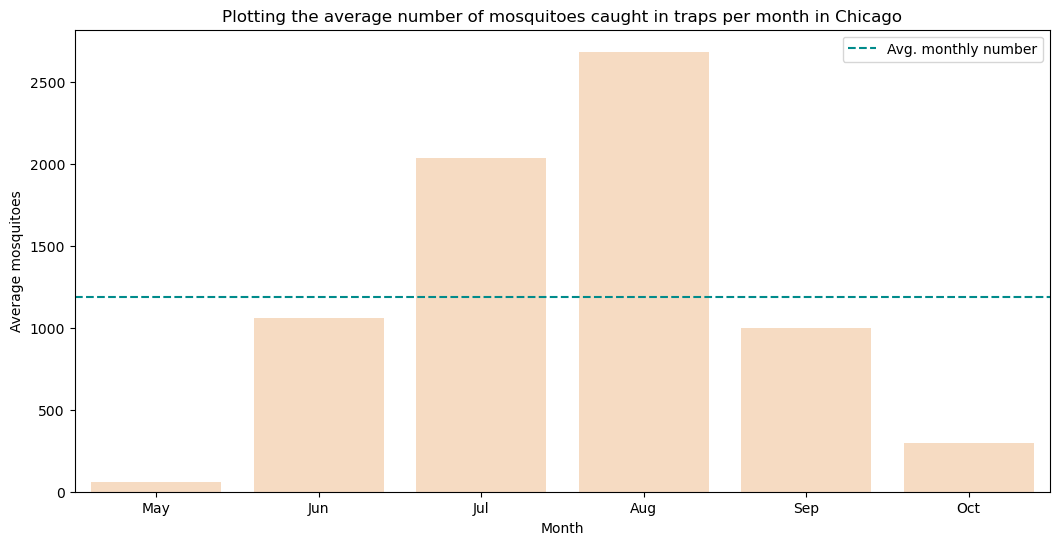

In [55]:
month_names = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

# Plotting average mosquito numbers
plt.figure(figsize=(10, 6))
sns.barplot(x=month_num.index, y=month_num['Mosquito number'], color='peachpuff')
plt.axhline(glob_avg, label='Avg. monthly number', linestyle='--', color='darkcyan')
plt.xticks(ticks=range(len(month_names)), labels=month_names)
plt.xlabel('Month')
plt.ylabel('Average mosquitoes')
plt.title('Plotting the average number of mosquitoes caught in traps per month in Chicago')
plt.legend()

# Adjust layout to center the plot
plt.subplots_adjust(right=1.1)
plt.show()

As expected, we see that the average numbers of trapped mosquitoes are at their highest in the summer months (June-August) with the peak in August. The first recorded numbers are in May, the month in which they are at their lowest level. The June level is much higher than the May level which is a far steeper increase than the decrease observed after August. 

- Of the 6 months of available data, only two months record an average mosquito number greater than the global mean.
- August has a substatially higher average than other months with an average of 2,684 mosquitos.

#### Another way of interpreting the average monthly number of mosquitos

In [56]:
# Group by month and calculate the average.
monthly_average = df.groupby(df['Month'])['Mosquito number'].mean()
median = df['Mosquito number'].median()
mean = df['Mosquito number'].mean()

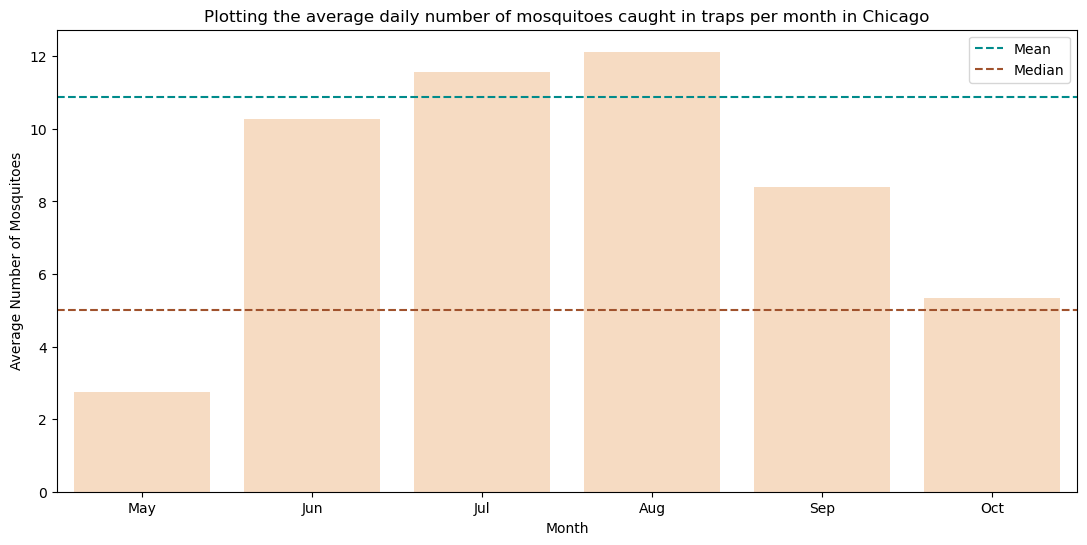

In [57]:
plt.figure(figsize=(8, 6))
sns.barplot(x=monthly_average.index, y=monthly_average.values, color='peachpuff')
plt.xlabel('Month')
plt.ylabel('Average Number of Mosquitoes')
plt.axhline(mean, color='darkcyan', linestyle='dashed', label='Mean')
plt.axhline(median, color='sienna', linestyle='dashed', label='Median')
plt.title('Plotting the average daily number of mosquitoes caught in traps per month in Chicago')
plt.legend()
plt.xticks(ticks=range(len(month_names)), labels=month_names)

# Adjust layout to center the plot.
plt.subplots_adjust(right=1.4)
plt.show()

- The above plot is far less informative than the previous.

---

<a id='Part2.2'></a>

### Now let's take a look at the relationship between Mosquito Number and Date. We will begin by examining Mosquito Number and Week, followed by Mosquito Number by Year.

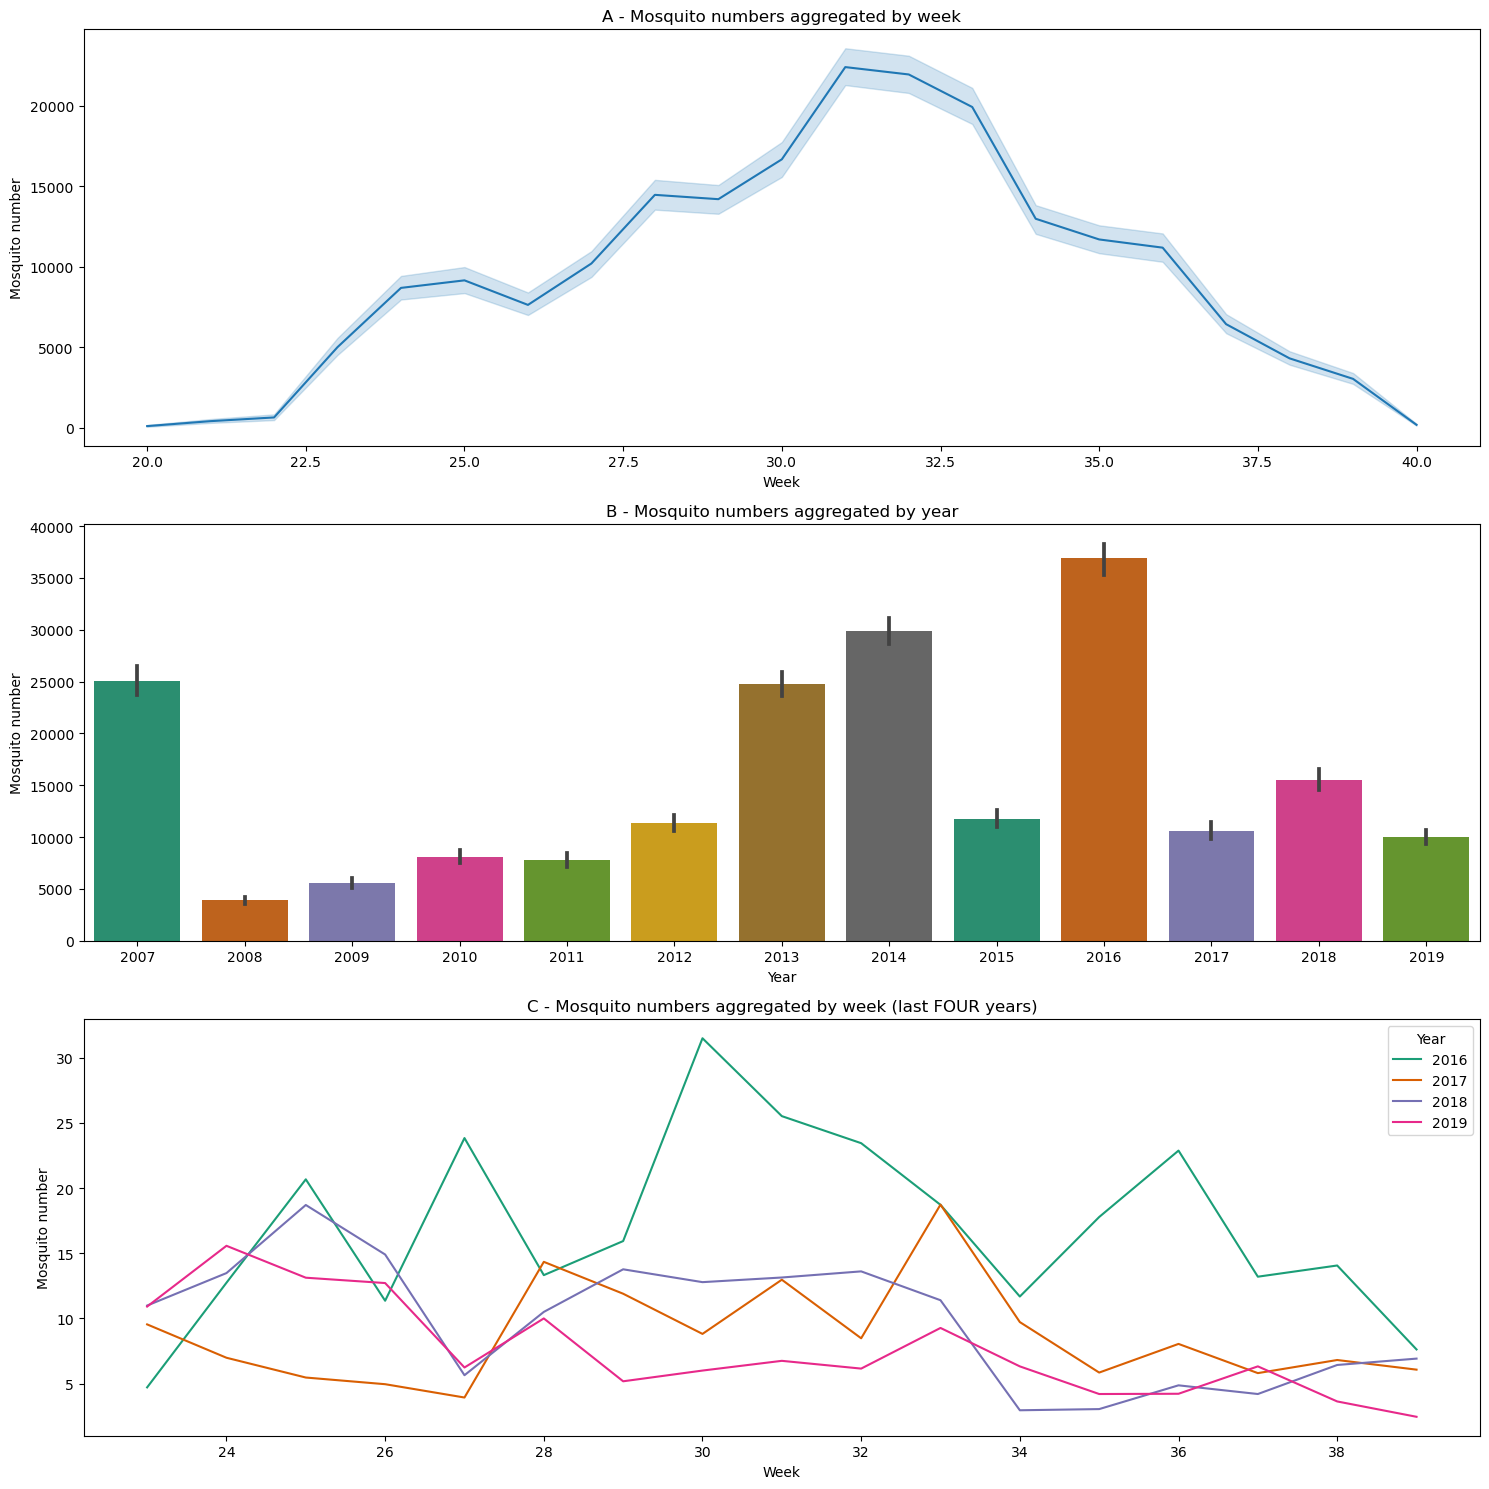

In [58]:
# plot in 3 parts
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
sns.lineplot(data=df, x='Week', y='Mosquito number', estimator='sum', palette='Dark2')
plt.ylabel('Mosquito number')
plt.xlabel('Week')
plt.title('A - Mosquito numbers aggregated by week')

plt.subplot(3, 1, 2)
sns.barplot(data=df, x='Year', y='Mosquito number', estimator=sum, palette='Dark2')
plt.ylabel('Mosquito number')
plt.xlabel('Year')
plt.title('B - Mosquito numbers aggregated by year')

plt.subplot(3, 1, 3)
last_four_years = df[(df['Year'] >= 2016) & (df['Year'] <= 2019)]
sns.lineplot(data=last_four_years, x='Week', y='Mosquito number', hue='Year', palette='Dark2', ci=None)
plt.title('C - Mosquito numbers aggregated by week (last FOUR years)')

plt.tight_layout()
plt.show()

These plots are very insightful. **Plot A** shows that mosquito numbers tend to peak at around Week 31-32 each year. Numbers grow steadily from baseline in Week 20 and fall more sharply back to baseline by Week 40. **Plot B** shows that mosquito numbers vary considerably from year to year. Of the 13 years of records, 9 years have mosquito numbers recorded at ~10,000 or less. 2016 saw over 3.5 times that number recorded in a single season. Although a quick internet search highlighted that mosquitoes tend to thrive in hotter temperatures, this association was not obvious in the data. It might be possible that data recording routines may have varied from year to year. **Plot C** highlights that peaks in mosquito numbers also vary from year to year. Numbers did not peak in the 'typical' Week 31-32 window in the past 4 years. Instead, peaks were at Week 30 (2016), Week 33 (2017), Week 25 (2018) and Week 24 (2017). Although out of the scope of our work here, it would be interesting to take a more detailed look at the weather patterns in these years to discern whether there are any associations between weather conditions during the mosquito life cycle and the peaks in numbers.

- Let's take a more granular look at our data and plot average Mosquito number by Species over time to see if we learn anything new.

In [59]:
# avg numbers per week per sepcies
num_species_per_week = df.groupby(['Species', 'Week'])['Mosquito number'].agg('mean').reset_index()
num_species_per_week.rename(columns={'Mosquito number': 'Avg mosquito numbers'}, inplace=True)
num_species_per_week

,Species,Week,Avg mosquito numbers
0,CULEX PIPIENS,20,1.000000
1,CULEX PIPIENS,21,2.071429
2,CULEX PIPIENS,22,1.928571
3,CULEX PIPIENS,23,3.363636
4,CULEX PIPIENS,24,1.576923
...,...,...,...
74,CULEX TERRITANS,36,2.922078
75,CULEX TERRITANS,37,1.597015
76,CULEX TERRITANS,38,1.277778
77,CULEX TERRITANS,39,1.485714


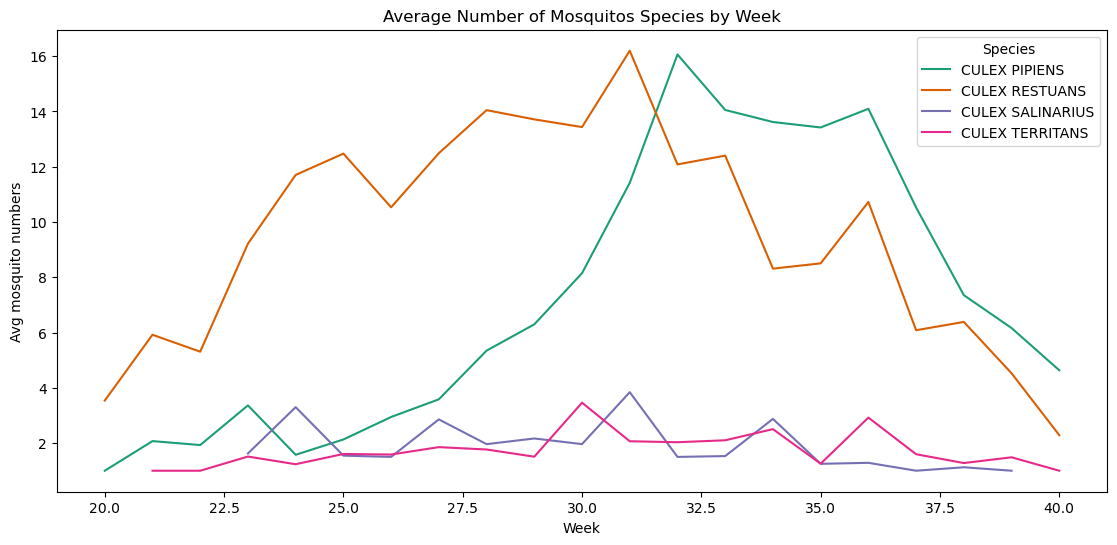

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=num_species_per_week, x='Week', y='Avg mosquito numbers', hue='Species', palette='Dark2')
plt.subplots_adjust(left=0.1, right=1.15)
plt.title('Average Number of Mosquitos Species by Week')
plt.show()

We can observe that the average mosquito numbers for both **Culex Pipiens** and **Culex Restuans** species appear to peak between weeks 30-31. However, the prevalence of the **Culex Pipiens** species only grows steeply from Week 29 whereas **Culex Restuans** maintain or surpass this level between Week 22 and Week 37. It is quite possible that the life cycle and habits of the different species varies. We can see that the prevalence of the other two species is fairly flat throughout the season.

---

<a id='Part2.3'></a>

### Now let's take a look at the different traps within our dataframe.

Earlier, we saw that the **Gravid** trap was associated with ~96% of records. Here is a reminder:

In [61]:
# A quick look at the distribution of traps in our data as a percentage.
df['Trap type'].value_counts(normalize=True)

GRAVID      0.959199
CDC         0.029437
SENTINEL    0.011310
OVI         0.000054
Name: Trap type, dtype: float64

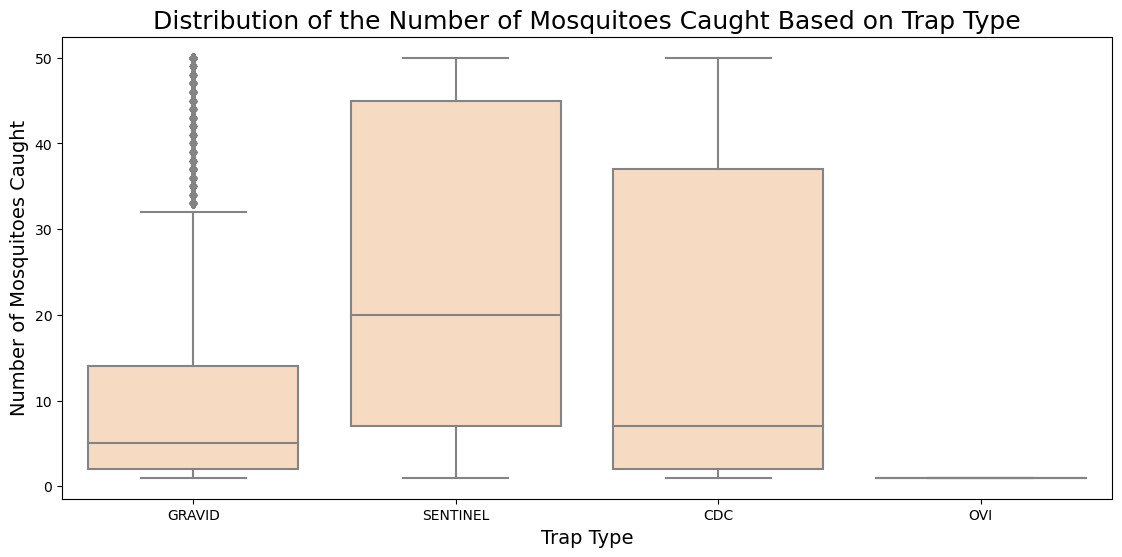

In [62]:
# Plotting box plots for each trap.
plt.figure(figsize=(10, 6))
sns.boxplot(x="Trap type", y="Mosquito number", data=df, color="peachpuff")
plt.xlabel("Trap Type", fontsize=14)
plt.ylabel("Number of Mosquitoes Caught", fontsize=14)
plt.title("Distribution of the Number of Mosquitoes Caught Based on Trap Type", fontsize=18)
plt.subplots_adjust(left=0.1, right=1.15)
plt.show()

A box plot indicates the distribution of mosquitoes caught per trap type. From this we make a few observations:
- the 'OVI' trap can be ignored (we saw previously that there is only 1 record of this trap type)
- the 'Sentinel' trap catches the most mosquitoes on average, followed by 'CDC' and 'Gravid'
- there are a large number of outliers associated with the 'Gravid' trap
- caution must be exercised because there are so much fewer records associated with 'Sentinel', 'CDC' and 'OVI'

### What about how the traps with positive test results are distributed throughout the year?

We can also explore the proportion of traps returning WNV positive tests per week.

In [63]:
wnv_per_week = df.groupby(df['Week'])['WNV Present'].value_counts()

# The groupby method creates a pandas series, but it will be easier to work with a data frame.
wnv_per_week = pd.DataFrame(wnv_per_week)
wnv_per_week.columns = ['Count']            # name additional column
wnv_per_week = wnv_per_week.reset_index()
wnv_per_week.head()

,Week,WNV Present,Count
0,20,negative,29
1,21,negative,78
2,22,negative,129
3,23,negative,600
4,23,positive,3


In [64]:
# Pivot to get the positive and negative counts on the same row.
wnv_per_week = wnv_per_week.pivot(index='Week', columns='WNV Present', values='Count')
wnv_per_week.head()

WNV Present,negative,positive
Week,,
20,29.0,NaN
21,78.0,NaN
22,129.0,NaN
23,600.0,3.0
24,802.0,NaN


In [65]:
wnv_per_week.fillna(0, inplace=True)   # If no positives, 0 needs to be imputed.
wnv_per_week.head()

WNV Present,negative,positive
Week,,
20,29.0,0.0
21,78.0,0.0
22,129.0,0.0
23,600.0,3.0
24,802.0,0.0


In [66]:
# calculating fraction of positives

neg = wnv_per_week['negative']
pos = wnv_per_week['positive']

wnv_per_week['Fraction WNV positive'] = pos/(pos + neg)

In [67]:
wnv_per_week.head()

WNV Present,negative,positive,Fraction WNV positive
Week,,,
20,29.0,0.0,0.000000
21,78.0,0.0,0.000000
22,129.0,0.0,0.000000
23,600.0,3.0,0.004975
24,802.0,0.0,0.000000


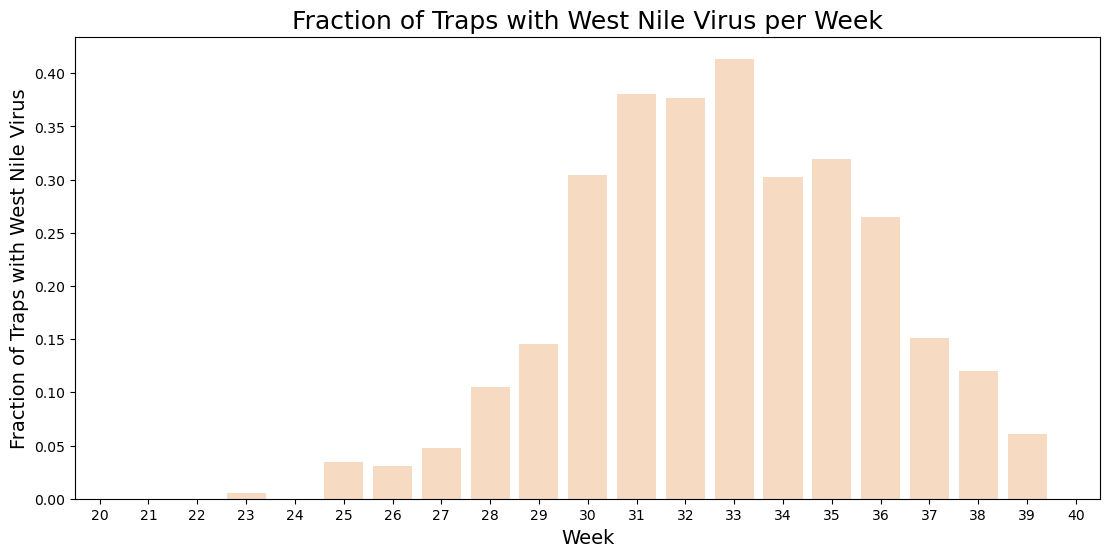

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x=wnv_per_week.index, y=wnv_per_week["Fraction WNV positive"], color='peachpuff')
plt.xlabel("Week", fontsize=14)
plt.ylabel("Fraction of Traps with West Nile Virus", fontsize=14)
plt.title("Fraction of Traps with West Nile Virus per Week", fontsize=18)
plt.subplots_adjust(right=1.15)
plt.show()

- We can see that the proportion of 'positive' traps appears to peak in Week 33. We recall that this falls just after the peak in total mosquito numbers.

---

<a id='Part2.4'></a>

### Now that we have an understanding of how mosquito population changes over time, let's explore the prevelance of WNV across species.

In [69]:
# Feature creation.
df['WNV Present digit'] = df['WNV Present'].replace({'positive': 1, 'negative': 0})

In [70]:
df.head()

,Year,Week,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Day,Month,WNV Present digit
0,2019,39,GRAVID,2,negative,CULEX RESTUANS,41.979340,-87.908920,26,9,0
1,2019,39,GRAVID,1,negative,CULEX RESTUANS,41.798211,-87.736925,26,9,0
2,2019,39,GRAVID,2,negative,CULEX RESTUANS,41.987245,-87.689417,26,9,0
3,2019,39,GRAVID,1,negative,CULEX RESTUANS,41.953664,-87.724987,26,9,0
4,2019,39,GRAVID,9,negative,CULEX RESTUANS,41.657069,-87.546049,26,9,0


In [71]:
wnv_per_species = df.groupby(df['Species'])['WNV Present'].value_counts()

# The groupby method creates a pandas series, but it will be easier to work with a data frame.
wnv_per_species = pd.DataFrame(wnv_per_species)
wnv_per_species.columns = ['Count']            # name additional column
wnv_per_species = wnv_per_species.reset_index()
wnv_per_species.head()

,Species,WNV Present,Count
0,CULEX PIPIENS,negative,4067
1,CULEX PIPIENS,positive,1412
2,CULEX RESTUANS,negative,9306
3,CULEX RESTUANS,positive,2553
4,CULEX SALINARIUS,negative,215


In [72]:
# Pivot to get the positive and negative counts on the same row
wnv_per_species = wnv_per_species.pivot(index='Species', columns='WNV Present', values='Count').reset_index()
wnv_per_species.head()

WNV Present,Species,negative,positive
0,CULEX PIPIENS,4067,1412
1,CULEX RESTUANS,9306,2553
2,CULEX SALINARIUS,215,11
3,CULEX TERRITANS,902,14


In [73]:
neg_species = wnv_per_species['negative']
pos_species = wnv_per_species['positive']

# calculate percentage of WNV positive traps
wnv_per_species['pct_positive'] = pos_species/(neg_species+pos_species)*100


In [74]:
wnv_per_species.sort_values(by='pct_positive', ascending = True, inplace = True)
wnv_per_species


WNV Present,Species,negative,positive,pct_positive
3,CULEX TERRITANS,902,14,1.528384
2,CULEX SALINARIUS,215,11,4.867257
1,CULEX RESTUANS,9306,2553,21.527953
0,CULEX PIPIENS,4067,1412,25.771126


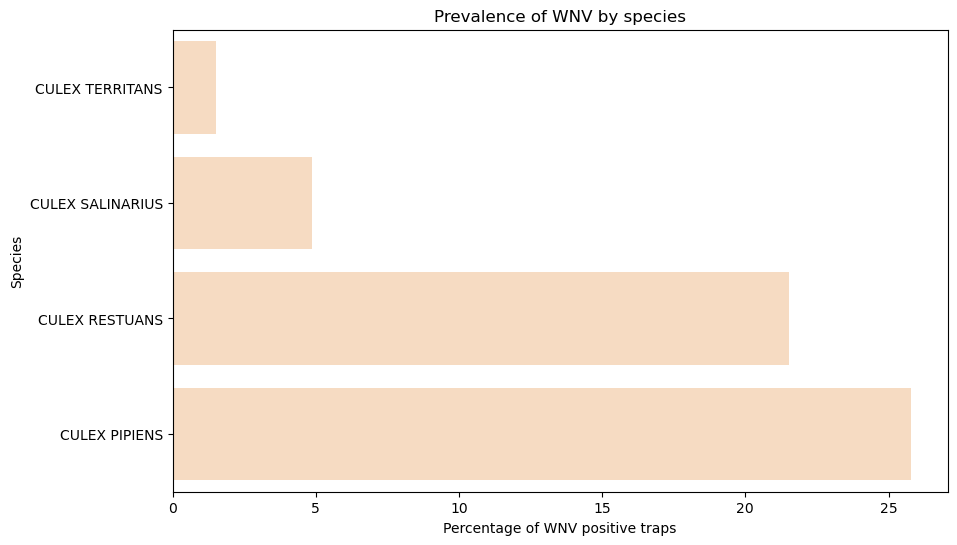

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pct_positive', y='Species', data=wnv_per_species, color='peachpuff')
plt.xlabel('Percentage of WNV positive traps')
plt.ylabel('Species')
plt.title('Prevalence of WNV by species')
plt.show()

- In the above plot we can see that both the **Culex Pipiens** and **Culex Restuans** species appear to return significantly higher percentages of positive WNV tests than the other species. In fact, the positive rate is ~5 times higher for the **Culex Pipiens** species than the **Culex Salinarius** species.

#### Using a scatterplot, we can plot average mosquito numbers against that percentage of traps testing positive for each species in order to test for any association.

In [76]:
df.head()

,Year,Week,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Day,Month,WNV Present digit
0,2019,39,GRAVID,2,negative,CULEX RESTUANS,41.979340,-87.908920,26,9,0
1,2019,39,GRAVID,1,negative,CULEX RESTUANS,41.798211,-87.736925,26,9,0
2,2019,39,GRAVID,2,negative,CULEX RESTUANS,41.987245,-87.689417,26,9,0
3,2019,39,GRAVID,1,negative,CULEX RESTUANS,41.953664,-87.724987,26,9,0
4,2019,39,GRAVID,9,negative,CULEX RESTUANS,41.657069,-87.546049,26,9,0


In [77]:
agg_data = df.groupby(['Week','Species'])[['Mosquito number','WNV Present digit']].agg('mean').reset_index()
agg_data

,Week,Species,Mosquito number,WNV Present digit
0,20,CULEX PIPIENS,1.000000,0.0
1,20,CULEX RESTUANS,3.538462,0.0
2,21,CULEX PIPIENS,2.071429,0.0
3,21,CULEX RESTUANS,5.920635,0.0
4,21,CULEX TERRITANS,1.000000,0.0
...,...,...,...,...
74,39,CULEX SALINARIUS,1.000000,0.0
75,39,CULEX TERRITANS,1.485714,0.0
76,40,CULEX PIPIENS,4.633333,0.0
77,40,CULEX RESTUANS,2.285714,0.0


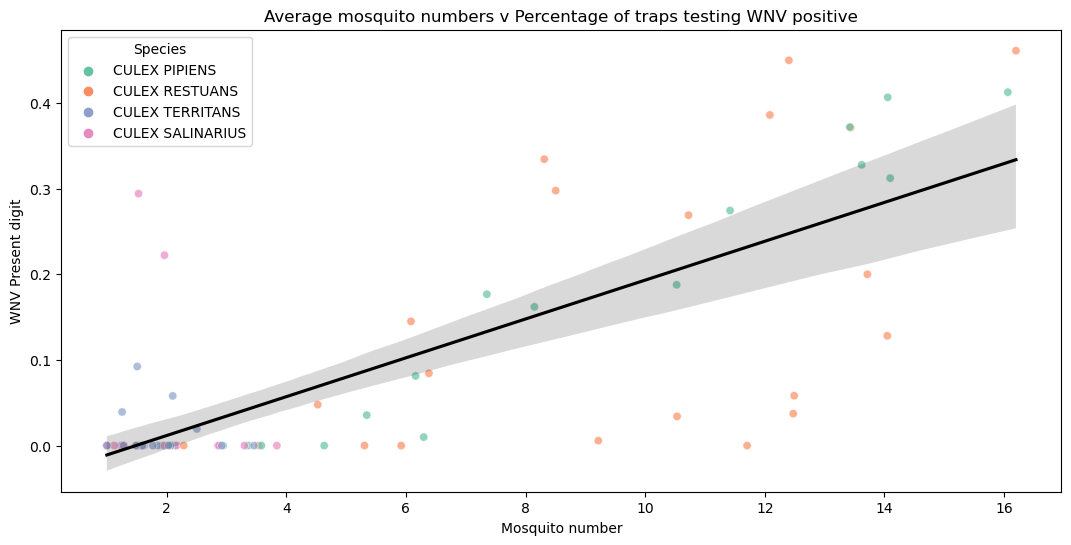

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=agg_data, x='Mosquito number', y='WNV Present digit', hue='Species', palette='Set2', alpha=0.7);
plt.xlabel('Average number of mosquitoes per trap in a week')
plt.ylabel('Percentage of traps returning a positive WNV test in a week')
plt.title('Average mosquito numbers v Percentage of traps testing WNV positive')
sns.regplot(data=agg_data, x='Mosquito number', y='WNV Present digit', scatter=False, color='black')
plt.subplots_adjust(left=-0.1)
plt.show()

- Looking at the above scatterplot, the spread of data points associated with the **Culex Pipiens** species indicate a fairly linear relationship between average numbers of the species in a trap and the percentage of traps returning a positive WNV test. This is suggestive that the prevalence of the **Culex Pipiens** is a significant driver in the spread of **WNV**.

[Return Home](#Home)

---

<a id='Part3'></a>

## Part 3 - Statistical Analysis

Now that we have visualised our data we can begin to test the statistical significance of any assumptions we may have learned.

In this section, we test for differences in the occurence of West Nile Virus in each species. We will run a hypothesis test with the following definitions:
- **$H_0$** - null hypothesis - species and occurence of WNV are independent of each other
- **$H_1$** - alternative hypothesis - some relationship between species and occurence of WNV.

We would prefer that all samples are distributed similarly but there is a significant class imbalance in the `Species` column.

In [79]:
df.head()

,Year,Week,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Day,Month,WNV Present digit
0,2019,39,GRAVID,2,negative,CULEX RESTUANS,41.979340,-87.908920,26,9,0
1,2019,39,GRAVID,1,negative,CULEX RESTUANS,41.798211,-87.736925,26,9,0
2,2019,39,GRAVID,2,negative,CULEX RESTUANS,41.987245,-87.689417,26,9,0
3,2019,39,GRAVID,1,negative,CULEX RESTUANS,41.953664,-87.724987,26,9,0
4,2019,39,GRAVID,9,negative,CULEX RESTUANS,41.657069,-87.546049,26,9,0


In [80]:
# Creating a contingency table.
species_wnv_contingency = pd.crosstab(df['Species'], df['WNV Present'])
species_wnv_contingency

WNV Present,negative,positive
Species,,
CULEX PIPIENS,4067,1412
CULEX RESTUANS,9306,2553
CULEX SALINARIUS,215,11
CULEX TERRITANS,902,14


In [81]:
# Running Chi-squared test.
result = stats.chi2_contingency(species_wnv_contingency)
result

Chi2ContingencyResult(statistic=311.70368932373634, pvalue=2.9147516094812946e-67, dof=3, expected_freq=array([[4296.03409091, 1182.96590909],
       [9298.53409091, 2560.46590909],
       [ 177.20454545,   48.79545455],
       [ 718.22727273,  197.77272727]]))

In [82]:
print(f'The p-value is {result[1]}')
print(f'The ROUNDED p-value is {round(result[1], 4)}')

The p-value is 2.9147516094812946e-67
The ROUNDED p-value is 0.0


With a p-value of ~0, we can confidently reject the null hypothesis and conclude that species are not independent of the presence of the virus. It may be that some species have greater association with the presence of the virus than others. We note from the test output above that the **expected values** are very similar to the **actual values** for 'Culex Restuans' only; for each of the other species, the expected values are quite different from the reality. For example, in the case of 'Culex Territans', only ~1.5% of traps containing this species actually returned a positive test whereas >25% of traps containing the 'Culex Restuans' species were recorded positive.

---

#### For statistical analysis of the relationship between our features and `Mosquito number` we will create dummy variables for our columns storing categorical information.

In [83]:
# Replacing OVI name.
df['Trap type'].replace({'OVI': '1OVI'}, inplace=True)

In [84]:
# Dummy encoding 'Trap type'.
df = pd.get_dummies(df, columns=['Trap type'], prefix='traptype', prefix_sep='_', drop_first=True)

We need to decide which species to drop to avoid the dummy variable trap. Culex Salinarius is a good candidate here because this is the species with fewest records with our dataframe. This means that dropping this species will result in the smallest loss of data. As we saw earlier however, this species is 5x more likely to record a positive WNV test result than Culex Territans meaning it is more likely to be a species of concern compared to Culex Territans. This makes Culex Territans another candidate for removal since it's WNV rate of prevelance was so low. In our case, we will be trying to maintain as much data as possible for our statistical analysis.

In [85]:
df['Species'].value_counts()

CULEX RESTUANS      11859
CULEX PIPIENS        5479
CULEX TERRITANS       916
CULEX SALINARIUS      226
Name: Species, dtype: int64

In [86]:
# Replacing 'CULEX SALINARIUS' name.
df['Species'].replace({'CULEX SALINARIUS': '1CULEX SALINARIUS'}, inplace=True)

In [87]:
# Dummy encoding 'Species'.
df = pd.get_dummies(df, columns=['Species'], prefix='species', prefix_sep='_', drop_first=True)

In [88]:
# Binarising 'WNV Present'.
df['WNV Present'] = df['WNV Present'].map({'positive': 1, 'negative': 0})

In [89]:
# Sanity check.
df['WNV Present'].unique()

array([0, 1])

Let's check the correlations between our features, first we will need to drop the feature we created for plotting earlier called WNV Present Digit.

In [90]:
# Dropping feature.
df.drop(['WNV Present digit'], axis=1, inplace = True)

In [91]:
# Sanity check.
df.head(1)

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Day,Month,traptype_CDC,traptype_GRAVID,traptype_SENTINEL,species_CULEX PIPIENS,species_CULEX RESTUANS,species_CULEX TERRITANS
0,2019,39,2,0,41.97934,-87.90892,26,9,0,1,0,0,1,0


In [92]:
# function to simplify any future correlation matrices.
def heatmap_triangle(df):
    
    '''
    Input: name of dataframe (df)
    
    Output: heatmap of correlation matrix for input dataframe
    '''
    
    plt.figure(figsize=(10,8))
    mask=np.triu(df.corr())
    sns.heatmap(round(df.corr(),2), vmin=-1, vmax=1, center=0, annot=True, mask=mask, cmap='coolwarm')
    plt.show()

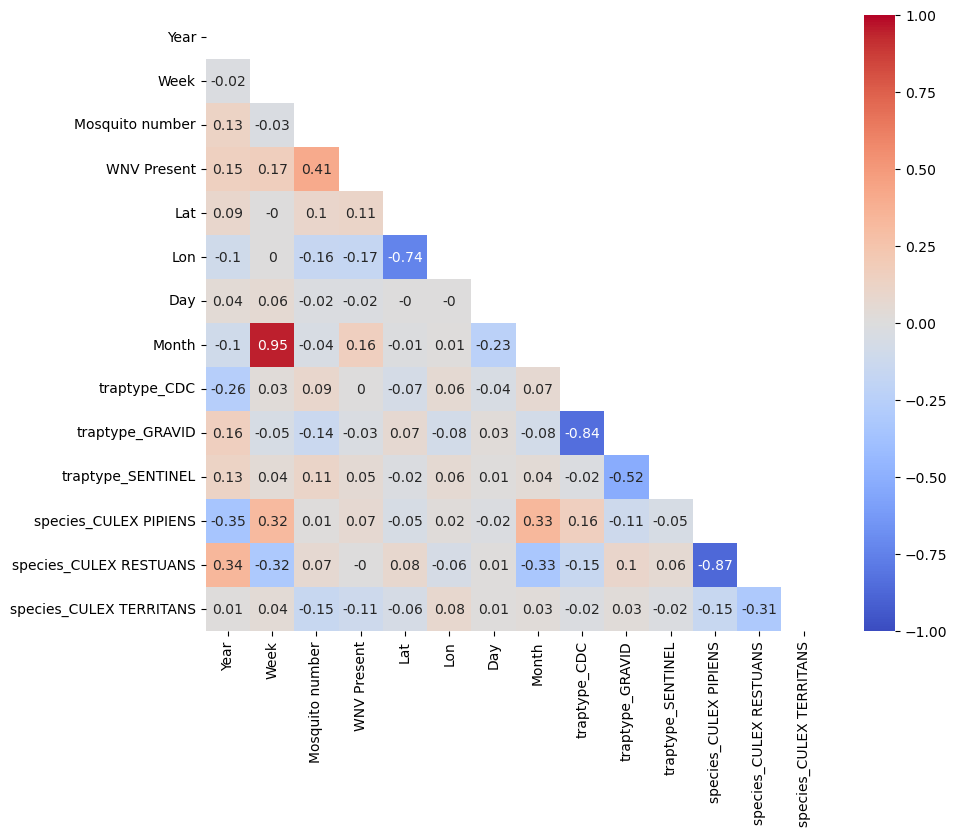

In [93]:
# Parsing the df to the heatmap_triangle function.
heatmap_triangle(df)

In [94]:
# Identifying positive and negative correlations.
corr_coef = df.corr()
corr_coef = pd.DataFrame(corr_coef['Mosquito number'])
corr_coef.drop(index='Mosquito number', inplace=True)     # remove 'Mosquito number' as correlation with self will be 1
corr_coef.columns=['Coefficient']
corr_coef

,Coefficient
Year,0.128708
Week,-0.033745
WNV Present,0.408428
Lat,0.097182
Lon,-0.155056
Day,-0.018975
Month,-0.040215
traptype_CDC,0.094079
traptype_GRAVID,-0.138200
traptype_SENTINEL,0.108542


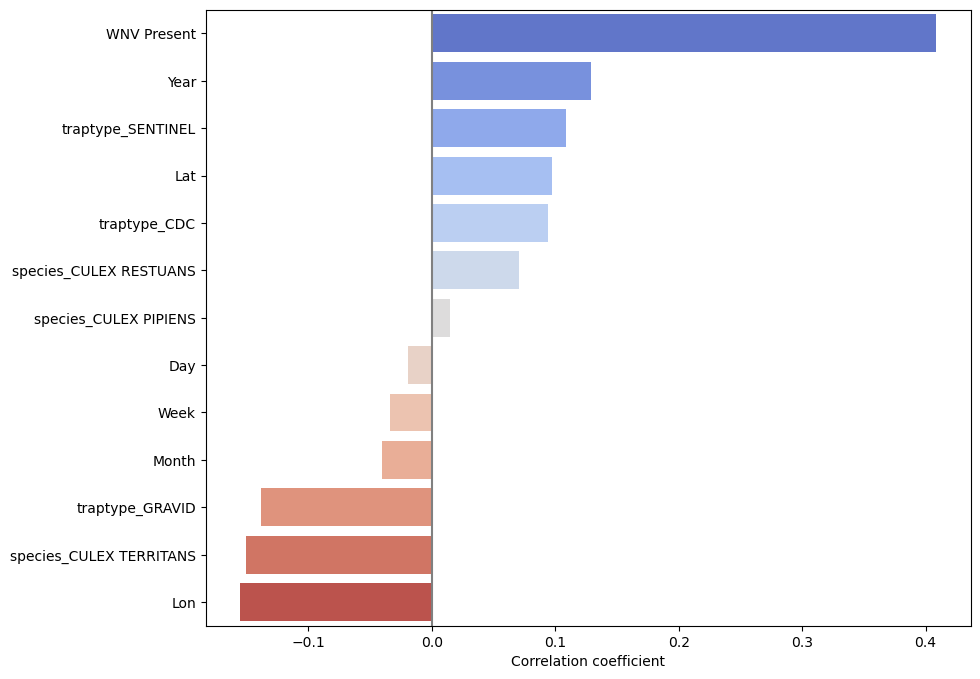

In [95]:
# Sort the DataFrame by 'Coefficient' in descending order
corr_coef.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(6, 8))  # Adjust the figure size to accommodate the vertical plot
sns.barplot(x=corr_coef['Coefficient'], y=corr_coef.index, palette='coolwarm')
plt.xlabel('Correlation coefficient')
plt.axvline(0, color='gray')
# Adjust layout to center the plot
plt.subplots_adjust(right=1.4)
plt.show()

At this point, we note that the strongest correlation is between `WNV Present` and `Mosquito number`. It is no huge surprise that the proportion of infections may be associated with mosquito numbers.

Next, we take a look at the statistical significance of each of the correlations. We will use the **pearsonr** test to generate the p-values, again using p=0.05 as the threshold for statistical significance.

In [96]:
# Independent variable names.
columns = corr_coef.index

# Empty list container for p-values.
pvalue_list = []

# Looping over PearsonR for each independent variable. 
for col in columns:
    pvalue = stats.pearsonr(df[col], df['Mosquito number'])[1]
    pvalue_list.append(pvalue)
    
# Flagging positive and negative correlation.
corr_coef['sign'] = np.where(corr_coef['Coefficient'] > 0, 'Positive', 'Negative')
corr_coef['stat_sig'] = np.round(pvalue_list, 4)     # Nsing numpy round as pandas round incompatible.

corr_coef

,Coefficient,sign,stat_sig
WNV Present,0.408428,Positive,0.0000
Year,0.128708,Positive,0.0000
traptype_SENTINEL,0.108542,Positive,0.0000
Lat,0.097182,Positive,0.0000
traptype_CDC,0.094079,Positive,0.0000
species_CULEX RESTUANS,0.070966,Positive,0.0000
species_CULEX PIPIENS,0.014804,Positive,0.0442
Day,-0.018975,Negative,0.0099
Week,-0.033745,Negative,0.0000
Month,-0.040215,Negative,0.0000


From the feedback above, we see that 4 of the numeric columns are negatively correlated with `Mosquito number` and 5 are positively correlated with our dependent variable.

All of our correlation coefficients are statistically significant given that they have values well below the 'p=0.05' threshold; they are all very close to ZERO.

[Return Home](#Home)

---

<a id='Part4'></a>

## Part 4 - Findings Summary

## Some key findings of the investigation are :-

### - Species of Concern
   - Culex Pipiens can be identified as a species of concern given that >25% of the test results involving this species produced a positive result for WNV. Furhtermore the linear relationship between the number of this species and number of positive WNV test results could indicate that this species is a driving contributer to WNV outbreaks. These points are confirmed by that statistical analysis undertakend in Part 3 of the report. There are a number of measures that can be implemented in an attempt to surpress the numbers of Culex Pipiens in Chicago, these include :-
        - The application of larvicides in known breeding locations.
        - Time specific targeted aldulticide spraying (both aerial and ground level).
        - Biological control through a population boosting program for the Green Darner Dragonfly, the primary natural predator of the adult Culex Pipiens.

### - Seasonality

   - There is a clear and distinct seasonality to the spread of WNV with the warmer months recording the vast majority of positive test results and greater numbers of the mosquitos. July and August alone record double the amount of average mosquituito numbers compared to all other months of available data combined. With information pertaining to when we are likely to see the most mosquitos and when those mosquitos are most likely to be carrying the virus we can make preventative efforts to stem the spread of the virus.
        - Extra efforts of population control should be implemented between weeks 30 and 33 when numbers for the two most concerning species are at their highest.

### - Better Trapping and Survailence

   - More than 95% of the traps used in the collection of this data were of the Gravid variety, this type of trap has a recorded median mosquito number of 5. This variety of trap is made up of two main parts, the first being a waterbath containing an oviposition medium made up of water and hay which is incubated for 5 days. The second part is the mosquito trapping net which features a small motorised fan at its opening to draw up mosquitos after being attracted to the waterbath for it's similarities to the insects breeding environments. These traps are cheap to produce and maintain since the motorised fan will run without issue on a domestic 6v battery for days on end, and can be modified to run/charge via solar power. 
   - The Sentinal trap type is similar in construction but instead of a waterbath attracter, it utilises CO2 and other sophisticated chemical compounds including the artificially created scent of human skin. With these more sophisticated methods of attraction, the Sentinel trap has a recorded median mosquito number of 20, capturing on average 4 times as many insects as the trap which makes up 95% of our equipment in this study. The more sophisticated traps are more expensive to acquire and maintain but this is a compromsise that would be worth entertaining.
       - With the updating of survey equipment, to more sophisticated traps we could see an increase in number of mosquitos captured, tests conducted and data produced, bettering our ability to combat the spread of WNV. 

[Return Home](#Home)

---